In [1]:
#zrobiono na podstawie https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline
from keras.callbacks import TensorBoard
from sklearn.preprocessing import OneHotEncoder
import random
import os
from IPython.display import display
from PIL import Image
from keras.models import load_model

Using TensorFlow backend.


In [2]:
#przygotowanie danych trenidngowych i walidacyjnych
IMG_DIM = (200, 200)

train_files = glob.glob(r'C:/Users/irekt/Desktop/ProjektDL/oregon_wildlife/train/*/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)

validation_files = glob.glob(r'C:/Users/irekt/Desktop/ProjektDL/oregon_wildlife/validation/*/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (12013, 200, 200, 3) 	Validation dataset shape: (2000, 200, 200, 3)


In [3]:
#przygotowanie lejbelek
train_labels = []
validation_labels= []

for folder in os.scandir(r'C:/Users/irekt/Desktop/ProjektDL/oregon_wildlife/train'):
    for image in os.scandir(folder.path):
        train_labels.append(image.path.split('\\')[1])
            #test.append(os.path.basename(os.scandir(folder.path)))

print(train_labels[5222:5228])

classes_list = []
for folder in os.scandir(r'C:/Users/irekt/Desktop/ProjektDL/oregon_wildlife/train'):
    for image in os.scandir(folder.path):
        validation_labels.append(image.path.split('\\')[1])
            #test.append(os.path.basename(os.scandir(folder.path)))

print(validation_labels[1220:1228])

['elk', 'elk', 'elk', 'elk', 'elk', 'elk']
['black_bear', 'black_bear', 'black_bear', 'black_bear', 'black_bear', 'black_bear', 'black_bear', 'black_bear']


(200, 200, 3)


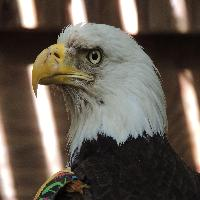

In [4]:
#normalizacja danych i sprawdzenie jak działa
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [5]:
#zmienna na liczbe epok
epochs = 50

In [6]:
#rzutownie lejbelek na cyfy i sprawdzenie jak działa
batch_size = 30
num_classes = 20

input_shape = (200, 200, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1644:1650], train_labels_enc[1644:1650])

['bobcat', 'bobcat', 'bobcat', 'bobcat', 'bobcat', 'bobcat'] [2 2 2 2 2 2]


In [7]:
#import i zamrożenie sieci vgg16
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

W0914 16:18:09.296582 12088 deprecation_wrapper.py:119] From C:\Users\irekt\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0914 16:18:10.362074 12088 deprecation_wrapper.py:119] From C:\Users\irekt\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0914 16:18:10.451994 12088 deprecation_wrapper.py:119] From C:\Users\irekt\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0914 16:18:10.561735 12088 deprecation_wrapper.py:119] From C:\Users\irekt\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0914 16:18:10.988677 12088 deprecation_wrapper.py:119] From C:\Users\irekt\Ana

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000001F97CC7F0F0>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x000001F6E9867080>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x000001F6E97FA7B8>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x000001FB0DE44EF0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x000001FB0DE44E48>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x000001FB0DEA0400>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x000001FB0DEBAC50>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000001FB0DEBAC88>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x000001FB0DEEE7F0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x000001FB0DF0AF28>,block3_conv3,False


In [8]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

In [ ]:
#podstawienie danych pod sieć vgg16 2/2

train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

In [ ]:
#logowanie
import logging

    # configure logger
logger = logging.getLogger('small_convnet')
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()  # console handler
ch.setLevel(logging.INFO)
ch.setFormatter(logging.Formatter(fmt='%(asctime)s [%(name)s:%(levelname)s]: %(message)s',
                                      datefmt="%H:%M:%S"))
logger.addHandler(ch)

In [ ]:
#budowa sieci z użyciem vgg16 i podsumowanie modelu
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy']
              )

model.summary()

In [ ]:
#fit modelu
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[TensorBoard(log_dir=r'.\logs_top_model_vgg16')])
model.save(r'.\model_2_top\model_z_vgg16.h5')
#tutaj kończy się transfer learnig dalej będzie top tune

In [14]:
#Ładowanie modelu prostego 1/2
model_prosty = load_model(r'C:\Users\irekt\Desktop\ProjektDL\\modele razem\model_prosty_CNN.h5')


#Ładowanie modelu prostego 2/2
model_prosty.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])



In [10]:
#Ładowanie modelu prostego 2/2
#i = load_img(r'C:\Users\irekt\Desktop\ProjektDL\oregon_wildlife\train\bald_eagle\00e148aeea989ba56b.jpg' )
i = load_img(r'C:/Users/irekt/Desktop/ProjektDL/oregon_wildlife/train/black_bear/0a8eaec98cc2542440.jpg' )
x = img_to_array(i)
x = x.reshape((1,) + x.shape)
result = []
result = np.asarray(model_prosty.predict(x))
result = result.argmax(axis=-1)
result = result[0]
x = np.array(train_labels) 
x = np.unique(x)

print(x[result])

raven


In [22]:
model_InceptionV3 = load_model(r'C:\Users\irekt\Desktop\ProjektDL\model_InceptionV3\InceptionV3.h5')

In [21]:
#ładowanie modelu z VGG16

model_z_vgg16 = load_model(r'C:\Users\irekt\Desktop\ProjektDL\modele razem\model_z_vgg16.h5')


In [16]:
#sprawdzenie
def sprawdzenie(liczba_zdjec):
    for n in range(liczba_zdjec):  
        #losowanie zdjęc i ładowanie
        directory = r'C:/Users/irekt/Desktop/ProjektDL/oregon_wildlife/validation/'
        random_image = random.choice(os.listdir(directory))
        directory = (directory + random_image)
        random_image = random.choice(os.listdir(directory))
        path = (directory + '/' +random_image)
        i = load_img(path, target_size=IMG_DIM )

        #konwersja zdjęć na potrzeby modelu z vgg16
        test_imgs = img_to_array(i)
        test_imgs = np.array(test_imgs)
        test_imgs_scaled  = test_imgs.astype('float32')
        test_imgs_scaled = test_imgs_scaled.reshape((1,) + test_imgs_scaled.shape)
        test_imgs_scaled /= 255
        #model z vgg16
        test_bottleneck_features = get_bottleneck_features(vgg_model, test_imgs_scaled)

        predictions = model_z_vgg16.predict_classes(test_bottleneck_features, verbose=0)

        predictions = le.inverse_transform(predictions)

        #model prosty
        x = img_to_array(i)
        x = x.reshape((1,) + x.shape)
        result = []
        result = np.asarray(model_prosty.predict(x))
        result = result.argmax(axis=-1)
        result = result[0]
        x = np.array(train_labels) 
        x = np.unique(x)

        etykieta = os.path.dirname(path)
        etykieta = os.path.basename(etykieta)
        display(Image.open(path))
        print('Klasa właściwa: ',etykieta)
        print('Klasa według sieci prostej CNN: ',x[result])
        print('Klasa według sieci z użyciem VGG16: ',str(predictions))

25


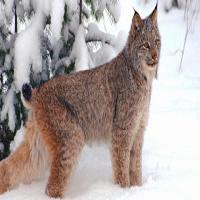

Klasa właściwa:  canada_lynx
Klasa według sieci prostej CNN:  gray_wolf
Klasa według sieci z użyciem VGG16:  ['canada_lynx']


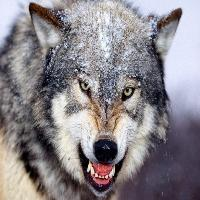

Klasa właściwa:  gray_wolf
Klasa według sieci prostej CNN:  gray_wolf
Klasa według sieci z użyciem VGG16:  ['gray_wolf']


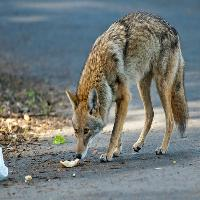

Klasa właściwa:  coyote
Klasa według sieci prostej CNN:  canada_lynx
Klasa według sieci z użyciem VGG16:  ['coyote']


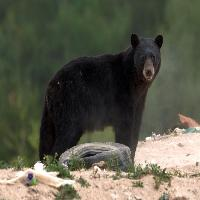

Klasa właściwa:  black_bear
Klasa według sieci prostej CNN:  deer
Klasa według sieci z użyciem VGG16:  ['black_bear']


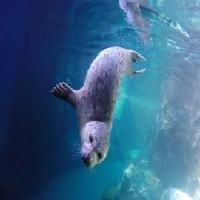

Klasa właściwa:  seals
Klasa według sieci prostej CNN:  seals
Klasa według sieci z użyciem VGG16:  ['seals']


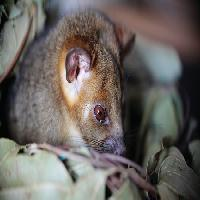

Klasa właściwa:  ringtail
Klasa według sieci prostej CNN:  bobcat
Klasa według sieci z użyciem VGG16:  ['ringtail']


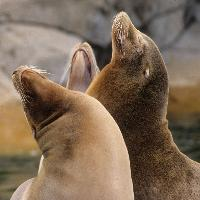

Klasa właściwa:  sea_lions
Klasa według sieci prostej CNN:  columbian_black-tailed_deer
Klasa według sieci z użyciem VGG16:  ['sea_lions']


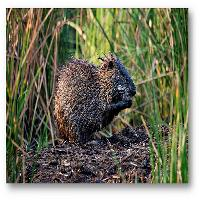

Klasa właściwa:  nutria
Klasa według sieci prostej CNN:  mountain_beaver
Klasa według sieci z użyciem VGG16:  ['nutria']


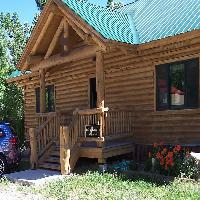

Klasa właściwa:  elk
Klasa według sieci prostej CNN:  cougar
Klasa według sieci z użyciem VGG16:  ['gray_wolf']


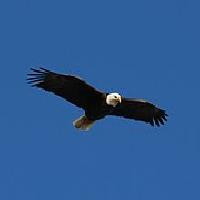

Klasa właściwa:  bald_eagle
Klasa według sieci prostej CNN:  bald_eagle
Klasa według sieci z użyciem VGG16:  ['bald_eagle']


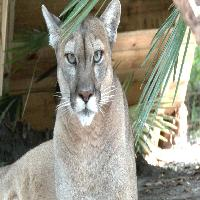

Klasa właściwa:  cougar
Klasa według sieci prostej CNN:  cougar
Klasa według sieci z użyciem VGG16:  ['cougar']


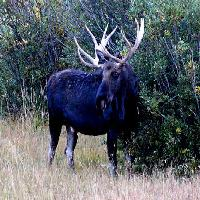

Klasa właściwa:  elk
Klasa według sieci prostej CNN:  elk
Klasa według sieci z użyciem VGG16:  ['elk']


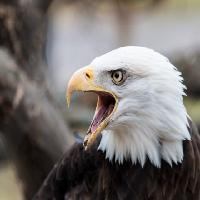

Klasa właściwa:  bald_eagle
Klasa według sieci prostej CNN:  bald_eagle
Klasa według sieci z użyciem VGG16:  ['bald_eagle']


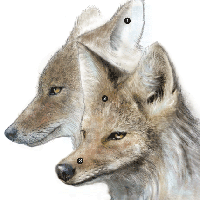

Klasa właściwa:  coyote
Klasa według sieci prostej CNN:  coyote
Klasa według sieci z użyciem VGG16:  ['coyote']


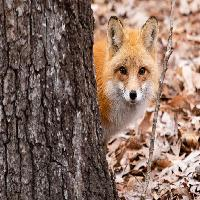

Klasa właściwa:  red_fox
Klasa według sieci prostej CNN:  red_fox
Klasa według sieci z użyciem VGG16:  ['red_fox']


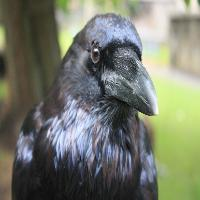

Klasa właściwa:  raven
Klasa według sieci prostej CNN:  raven
Klasa według sieci z użyciem VGG16:  ['raven']


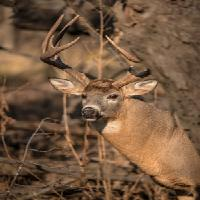

Klasa właściwa:  deer
Klasa według sieci prostej CNN:  seals
Klasa według sieci z użyciem VGG16:  ['deer']


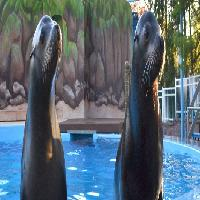

Klasa właściwa:  sea_lions
Klasa według sieci prostej CNN:  raccoon
Klasa według sieci z użyciem VGG16:  ['black_bear']


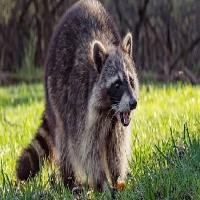

Klasa właściwa:  raccoon
Klasa według sieci prostej CNN:  gray_wolf
Klasa według sieci z użyciem VGG16:  ['raccoon']


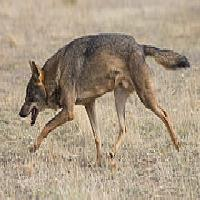

Klasa właściwa:  gray_wolf
Klasa według sieci prostej CNN:  canada_lynx
Klasa według sieci z użyciem VGG16:  ['gray_wolf']


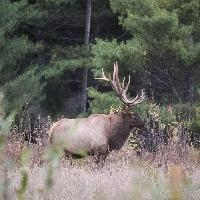

Klasa właściwa:  elk
Klasa według sieci prostej CNN:  mountain_beaver
Klasa według sieci z użyciem VGG16:  ['elk']


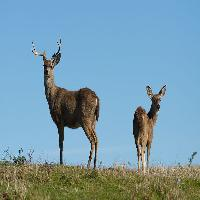

Klasa właściwa:  columbian_black-tailed_deer
Klasa według sieci prostej CNN:  columbian_black-tailed_deer
Klasa według sieci z użyciem VGG16:  ['columbian_black-tailed_deer']


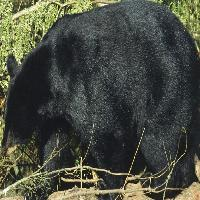

Klasa właściwa:  black_bear
Klasa według sieci prostej CNN:  ringtail
Klasa według sieci z użyciem VGG16:  ['black_bear']


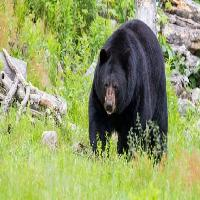

Klasa właściwa:  black_bear
Klasa według sieci prostej CNN:  black_bear
Klasa według sieci z użyciem VGG16:  ['black_bear']


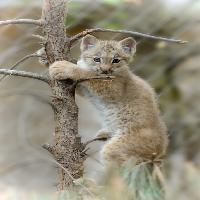

Klasa właściwa:  canada_lynx
Klasa według sieci prostej CNN:  deer
Klasa według sieci z użyciem VGG16:  ['bobcat']


In [25]:

sprawdzenie(int(input()))